# Capstone Project: Analyzing and Optimizing Bike-Sharing Rental Patterns

In [1]:
Introduction to Data Analysis
Understanding the Dataset
Load the dataset into a Pandas DataFrame and display the first 10 rows.
Identify the data types of each column.
Describe the real-world applications of this dataset. For instance, how might rental prediction impact business operations?
Python Libraries for Data Analysis: NumPy, Pandas, Matplotlib, Seaborn
Working with Pandas Structures
Create a Pandas Series using the rentals column.
Create a DataFrame using only the columns season, temp, windspeed, and rentals.
Perform basic operations on the DataFrame, such as renaming columns or adding a new column that calculates the temperature in Fahrenheit.
Exploratory Data Analysis (EDA)
Data Cleaning
Identify and handle missing values in the dataset (if any).
Check for duplicate rows and remove them if found.
Convert the dteday column into a datetime format and extract the day, month, and year into new columns.
Statistical Analysis
Calculate and display summary statistics (mean, median, standard deviation, and variance) for the columns temp, hum, and windspeed.
Identify any outliers in the rentals column using the IQR method.
Data Visualization Basics
Visualizing Trends and Patterns
Create a line plot showing the trend of rentals over the dteday.
Create a bar chart showing the average number of rentals for each season.
Plot a scatter plot to analyze the relationship between temp and rentals.
Exploring Data Distribution
Plot histograms for the columns temp, hum, and windspeed to observe their distributions.
Use a Seaborn heatmap to display the correlation matrix for all numerical columns in the dataset.
Data Manipulation Techniques
Filtering and Sorting
Filter the dataset to show only rows where season equals 2 (spring) and workingday is 1 (a working day).
Sort the filtered data by rentals in descending order.
Grouping and Aggregation
Use the groupby function to calculate the average rentals for each weathersit.
Group the data by mnth and calculate the total rentals for each month.
Hands-On Problems
Predictive Analysis Preparation
Identify the top 5 factors that correlate with rentals using the correlation matrix.
Use a scatter plot to visualize the strongest correlation with rentals.
Real-World Scenario
Imagine you are tasked with preparing a report on seasonal rental patterns. Using the dataset:
Create a summary table showing average rentals by season.
Plot a line chart of monthly rentals for each year (yr).
Discuss insights from the patterns observed in the visuals.

SyntaxError: invalid syntax (1320044381.py, line 1)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("daily-bike-share.csv")
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88
6,7,1/7/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148
7,8,1/8/2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68
8,9,1/9/2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54
9,10,1/10/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  rentals     731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000


# Working with Pandas Structures

In [6]:
#Creating a Series and a Subset DataFrame

# Create a Pandas Series using the 'rentals' column
rentals_series = df['rentals']

# Create a DataFrame with specific columns
subset_df = df[['season', 'temp', 'windspeed', 'rentals']]

In [7]:
# Basic DataFrame Operations:

# Rename columns
subset_df.rename(columns={'temp': 'temperature', 'windspeed': 'wind_speed'}, inplace=True)

# Add a column for temperature in Fahrenheit
subset_df['temp_fahrenheit'] = subset_df['temperature'] * 1.8 + 32


C:\Users\DELL\AppData\Local\Temp\ipykernel_23004\2503220088.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.rename(columns={'temp': 'temperature', 'windspeed': 'wind_speed'}, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_23004\2503220088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['temp_fahrenheit'] = subset_df['temperature'] * 1.8 + 32


# Exploratory Data Analysis (EDA)

In [8]:
# Check for missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
rentals       0
dtype: int64

In [9]:
# Drop duplicate rows if any
df = df.drop_duplicates()

In [10]:
# Convert 'dteday' to datetime and extract components
df['dteday'] = pd.to_datetime(df['dteday'])
df['day'] = df['dteday'].dt.day
df['month'] = df['dteday'].dt.month
df['year'] = df['dteday'].dt.year

# Statistical Analysis

In [11]:
# Summary statistics
df[['temp', 'hum', 'windspeed']].describe()

,temp,hum,windspeed
count,731.000000,731.000000,731.000000
mean,0.495385,0.627894,0.190486
std,0.183051,0.142429,0.077498
min,0.059130,0.000000,0.022392
25%,0.337083,0.520000,0.134950
50%,0.498333,0.626667,0.180975
75%,0.655417,0.730209,0.233214
max,0.861667,0.972500,0.507463


<Axes: >

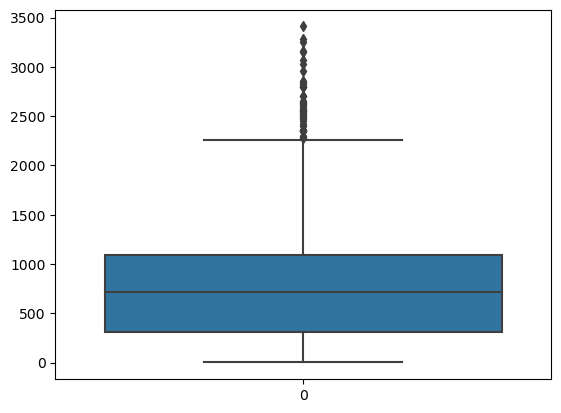

In [12]:
sns.boxplot(df['rentals'])

In [13]:
# Identify outliers in rentals using IQR

Q1 = df['rentals'].quantile(0.25)
Q3 = df['rentals'].quantile(0.75)
IQR = Q3 - Q1
outliers= df[(df['rentals'] < (Q1 - 1.5 * IQR)) | (df['rentals'] > (Q3 + 1.5 * IQR))]
outliers.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day,month,year
148,149,2011-05-29,2,0,5,0,0,0,1,0.667500,0.615550,0.818750,0.213938,2355,29,5,2011
183,184,2011-07-03,3,0,7,0,0,0,2,0.716667,0.668575,0.682500,0.228858,2282,3,7,2011
184,185,2011-07-04,3,0,7,1,1,0,2,0.726667,0.665417,0.637917,0.081479,3065,4,7,2011
196,197,2011-07-16,3,0,7,0,6,0,1,0.686667,0.638263,0.585000,0.208342,2418,16,7,2011
246,247,2011-09-04,3,0,9,0,0,0,1,0.709167,0.665429,0.742083,0.206467,2521,4,9,2011
281,282,2011-10-09,4,0,10,0,0,0,1,0.540833,0.523983,0.727500,0.063450,2397,9,10,2011
441,442,2012-03-17,1,1,3,0,6,0,2,0.514167,0.505046,0.755833,0.110704,3155,17,3,2012
447,448,2012-03-23,2,1,3,0,5,1,2,0.601667,0.570067,0.694167,0.116300,2469,23,3,2012
455,456,2012-03-31,2,1,3,0,6,0,2,0.424167,0.421708,0.738333,0.250617,2301,31,3,2012
456,457,2012-04-01,2,1,4,0,0,0,2,0.425833,0.417287,0.676250,0.172267,2347,1,4,2012


# Data Visualization Basics

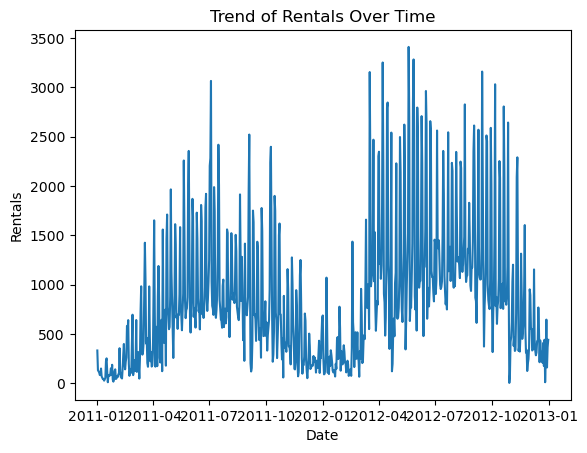

In [14]:
# Line plot for rentals over time
plt.plot(df['dteday'], df['rentals'])
plt.title('Trend of Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Rentals')
plt.show()

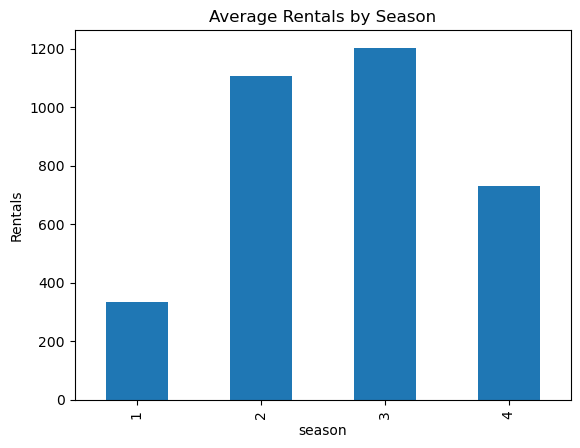

In [15]:
# Bar chart for average rentals by season
season_avg = df.groupby('season')['rentals'].mean()
season_avg.plot(kind='bar', title='Average Rentals by Season')
plt.ylabel('Rentals')
plt.show()

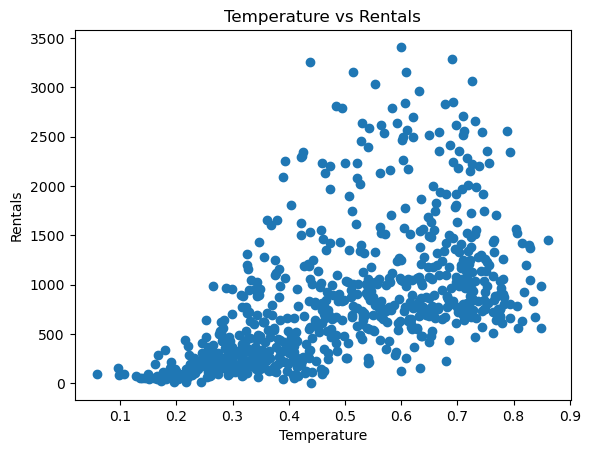

In [16]:
# Scatter plot of temperature vs rentals
plt.scatter(df['temp'], df['rentals'])
plt.title('Temperature vs Rentals')
plt.xlabel('Temperature')
plt.ylabel('Rentals')
plt.show()

# Exploring Data Distribution

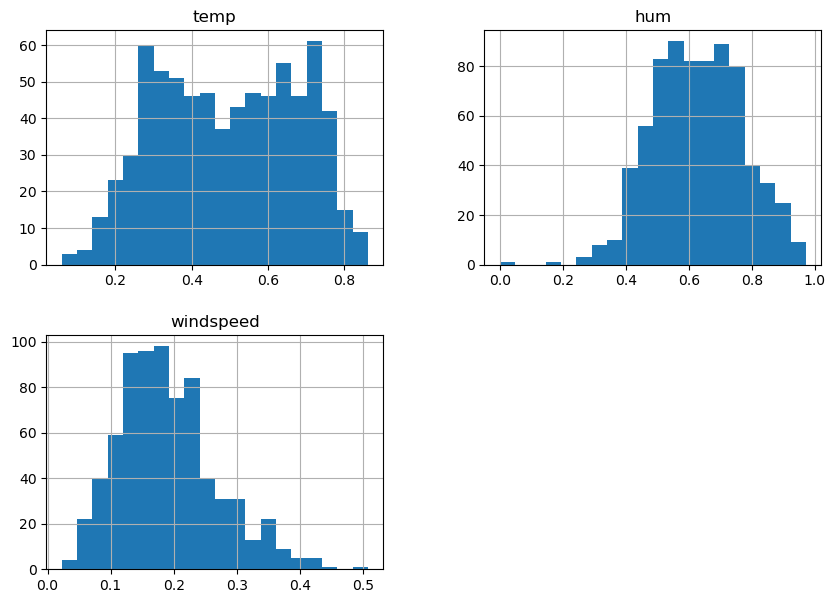

In [17]:
# Histograms
df[['temp', 'hum', 'windspeed']].hist(bins=20, figsize=(10, 7))
plt.show()

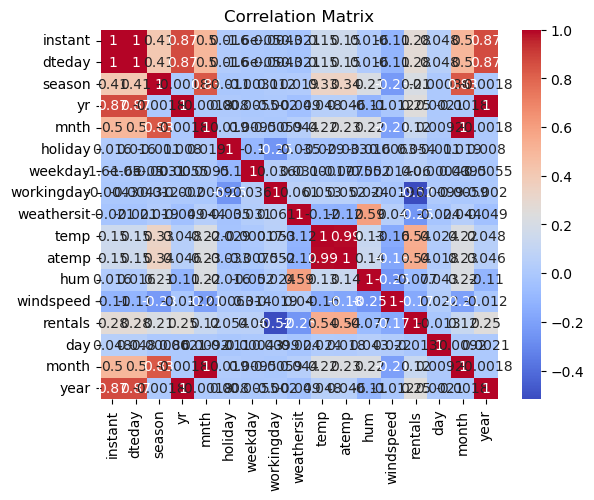

In [18]:
# Correlation matrix heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Data Manipulation Techniques

In [19]:
## Filtering and Sorting:

# Filter dataset
filtered_data = df[(df['season'] == 2) & (df['workingday'] == 1)]

# Sort by rentals in descending order
sorted_data = filtered_data.sort_values(by='rentals', ascending=False)


In [20]:
# Grouping and Aggregation:

# Group by 'weathersit' and calculate average rentals
avg_rentals_by_weather = df.groupby('weathersit')['rentals'].mean()

# Group by 'mnth' and calculate total rentals
monthly_rentals = df.groupby('month')['rentals'].sum()

# Hands-On Problems

Hands-On Problems
Predictive Analysis Preparation
Identify the top 5 factors that correlate with rentals using the correlation matrix.
Use a scatter plot to visualize the strongest correlation with rentals.
Real-World Scenario
Imagine you are tasked with preparing a report on seasonal rental patterns. Using the dataset:
Create a summary table showing average rentals by season.
Plot a line chart of monthly rentals for each year (yr).
Discuss insights from the patterns observed in the visuals.

In [21]:
# Top 5 correlated factors with rentals
correlation_with_rentals = corr_matrix['rentals'].sort_values(ascending=False)
top_5_factors = correlation_with_rentals[1:6]
top_5_factors

atemp      0.543864
temp       0.543285
dteday     0.275255
instant    0.275255
yr         0.248546
Name: rentals, dtype: float64

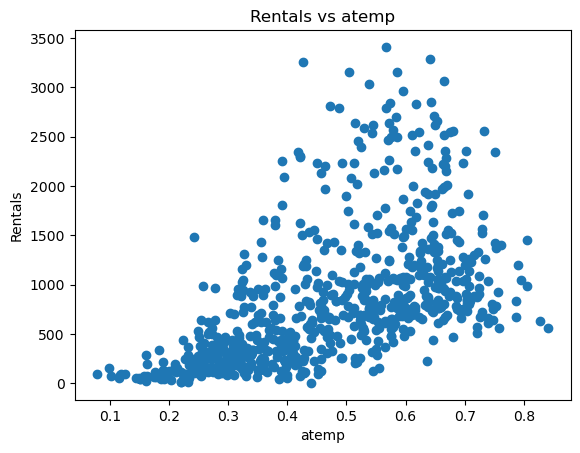

In [22]:
# Scatter plot for the strongest correlation
strongest_factor = top_5_factors.index[0]
plt.scatter(df[strongest_factor], df['rentals'])
plt.title(f'Rentals vs {strongest_factor}')
plt.xlabel(strongest_factor)
plt.ylabel('Rentals')
plt.show()

# Real-World Scenario

In [23]:
# Summary table: Average rentals by season
season_summary = df.groupby('season')['rentals'].mean()
season_summary

season
1     334.928177
2    1106.097826
3    1202.611702
4     729.112360
Name: rentals, dtype: float64

In [24]:
# Monthly rentals by year
monthly_rentals_by_year = df.groupby(['year', 'month'])['rentals'].sum().unstack()

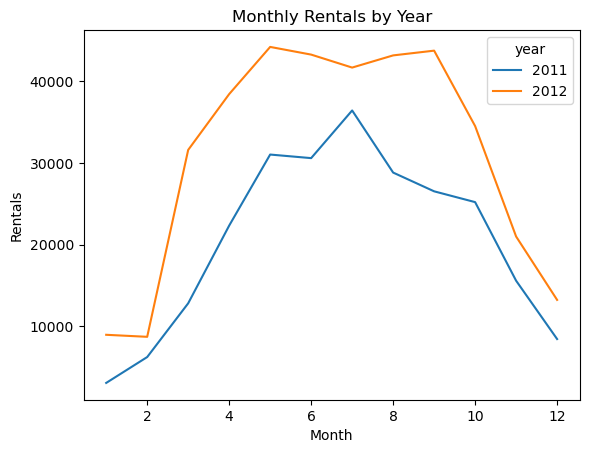

In [25]:
# Line chart of monthly rentals for each year
monthly_rentals_by_year.T.plot()
plt.title('Monthly Rentals by Year')
plt.xlabel('Month')
plt.ylabel('Rentals')
plt.show()


# Insights

### Rental Patterns

- Seasons: Rentals peak in spring and summer; lowest in winter.
- Years: Rentals show a consistent yearly increase, indicating growing popularity.
- Monthly Trends: Clear cyclical patterns align with favorable weather.

### Weather & Temperature

- Clear weather drives higher rentals, while rainy/snowy conditions lower them.
- Rentals rise with temperature but drop during extreme heat.

### Recommendations

- Seasonal Strategies: Boost bike availability and promotions in spring/summer; offer discounts in winter.
- Weather-Based Planning: Adjust resources based on weather forecasts; use app notifications to engage users.
- Operational Efficiency: Forecast demand using weather and temperature data to optimize bike allocation.